# Варіант 1 Страшук Віталій

## Хiд виконання роботи

Написати програму, яка реалiзує алгоритм градiєнтного спуску:

1. Розглянути функцію вартості

$$ E(w) = \frac{1}{2} \sigma^2 - r^T_{xd} w + \frac{1}{2} w^T R_x w, $$

$\quad \,\,\, \text{де} \,\, \sigma^2 - \text{константа}, \,\, r_{xd} = (a, b)^T$

$
\quad \,\,\, R_x =
\begin{pmatrix}
1 & c \\
c & 1
\end{pmatrix}
$

$\quad \,\,\, a,b,c \,\, \text{задані за варіантом}$

2. Використовуючи метод градiєнтного спуску, обчислити значення $w^∗(t)$, $t$ = 1, 2, ...., T при заданому значеннi параметра швидкостi навчання $\eta$.

3. Побудувати траєкторiю вектору ваг $w(t)$ у тривимiрному просторi i в площинi $W$

4. Пiдiбрати швидкiсть навчання $\eta_1$, при якiй алгоритм градiєнтного спуску збiгається. Обрати $\eta_2$, за якої алгоритм розходиться. Для обох цих випадкiв побудувати траекторiї ваг.

Значення параметрів згідно з варіантом: a = 0.5, b = 0.6, c = 0.7, η = 0.3


In [4]:
# код для центрування графіків
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
display: table-cell;
text-align: center;
vertical-align: middle;
}
</style>
""");

## 0. Аналітичний розв'язок задачі

Нехай w = (x, y), тоді:

$$ E(w) \, = \, \frac{1}{2} \sigma^2 - r^T_{xd} w + \frac{1}{2} w^T R_x w \, = \, \frac{1}{2} \sigma^2 - ax - by + \frac{1}{2} x^2 + cxy + \frac{1}{2} y^2$$

Підставимо $a = 0.5, \, b = 0.6, \, c = 0.7, \, \eta = 0.3, \, \sigma = \sqrt{2}$:

$$ E(w) = 0.5x^2+0.7xy−0.5x+0.5y^2−0.6y+1.0$$


Матриця $R_x$ - симетрична та додатньно визначена, тому цільова функція опукла, а її мінімум - глобальний. Знайдемо мінімум

$$
\begin{cases}
\cfrac{\partial E}{\partial x} = x + 0.7y - 0.5= 0 \\
\cfrac{\partial E}{\partial y} = y + 0.7x - 0.6 = 0
\end{cases}
\quad \Rightarrow \quad
\begin{cases}
x^* = \frac{8}{51} \\
y^* = \frac{25}{51}
\end{cases}
$$

$$ E(w^*) = 0.81 $$



## 1. Реалізація алгоритму

In [5]:
import numpy as np
from sympy import *

a = 0.5
b = 0.6
c = 0.7
learning_rate = 0.3

R_x = np.array([[1, c],
                [c, 1]])

r_xd = np.array([a, b])
sigma = np.sqrt(2)

x, y = symbols("x y") 
cost_func = 0.5*sigma**2 - a*x - b*y + 0.5*x**2 + c*x*y + 0.5*y**2
cost_func

0.5*x**2 + 0.7*x*y - 0.5*x + 0.5*y**2 - 0.6*y + 1.0

In [36]:
from IPython.display import display
import pandas as pd
import math
import time

def antigrad_value(x_k, function):
    gradient = [function.diff(var) for var in (x, y)]
    dict_ = {x:x_k[0], y:x_k[1]}
    
    return -1*np.array([gradient[i].subs(dict_) for i in range(len(gradient))])


def norm(x_k1, x_k2):
    temp = 0
    for ind in range(len(x_k1)):
        temp += (x_k1[ind] - x_k2[ind])**2

    return math.sqrt(temp)
    
    
def gradient_descent(function, x_0, eps, learning_rate, n = 6, max_iter = None):
    start = time.time()
    
    antigrad = antigrad_value(x_0, function)
    x_k1 = x_0
    x_k2 = x_k1 + learning_rate*antigrad
    points_info   = [x_k1, [round(element, n) for element in x_k2]]
    
    step = 0
    while norm(x_k1, x_k2) > eps:
        step += 1
        x_k1 = x_k2
        antigrad = antigrad_value(x_k1, function)
        x_k2 = x_k1 + learning_rate*antigrad
        
        points_info.append([round(element, n) for element in x_k2])
        
        if step == max_iter:
            break
            
    end = time.time()
    points_info   = np.array(points_info)
    
    # створимо масив зі значеннями функції 
    func_info = [function.subs({x:point[0], y:point[1]}) for point in points_info]
    func_info = np.array(func_info)
    
    # виведемо датафрейм зі значеннями змінних та функції
    info = np.concatenate((points_info, func_info[:, np.newaxis]), axis = 1)
    dataframe = pd.DataFrame({"x":info[:, 0], "y":info[:, 1], "function":info[:, 2]})
    display(dataframe)
    
    # також виведемо час виконання алгоритму в секундах 
    print("час виконання в секундах: ", round(end - start, 4) )
    return points_info

In [54]:
points_info = gradient_descent(function = cost_func, x_0 = [10, 15] , eps = 1e-4, learning_rate = 0.3, n = 6)

,x,y,function
0,10,15,254.500000000000
1,4.00000000000000,8.580000,62.6842004537582
2,1.148200,5.346000,16.4641337878160
3,-0.168920,3.681078,5.22998236984420
4,-0.741270,2.792228,2.41945108564108
...,...,...,...
82,0.155841,0.491218,0.813725805795123
83,0.155933,0.491126,0.813725743626358
84,0.156017,0.491042,0.813725711731692
85,0.156093,0.490966,0.813725661708332


час виконання в секундах:  0.3442


Значеня збігається к значеню знайденому аналітично

## 2. Візуалізація 

Спочатку побудуємо траєкторію вектора ваг в тривімірному просторі

In [55]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

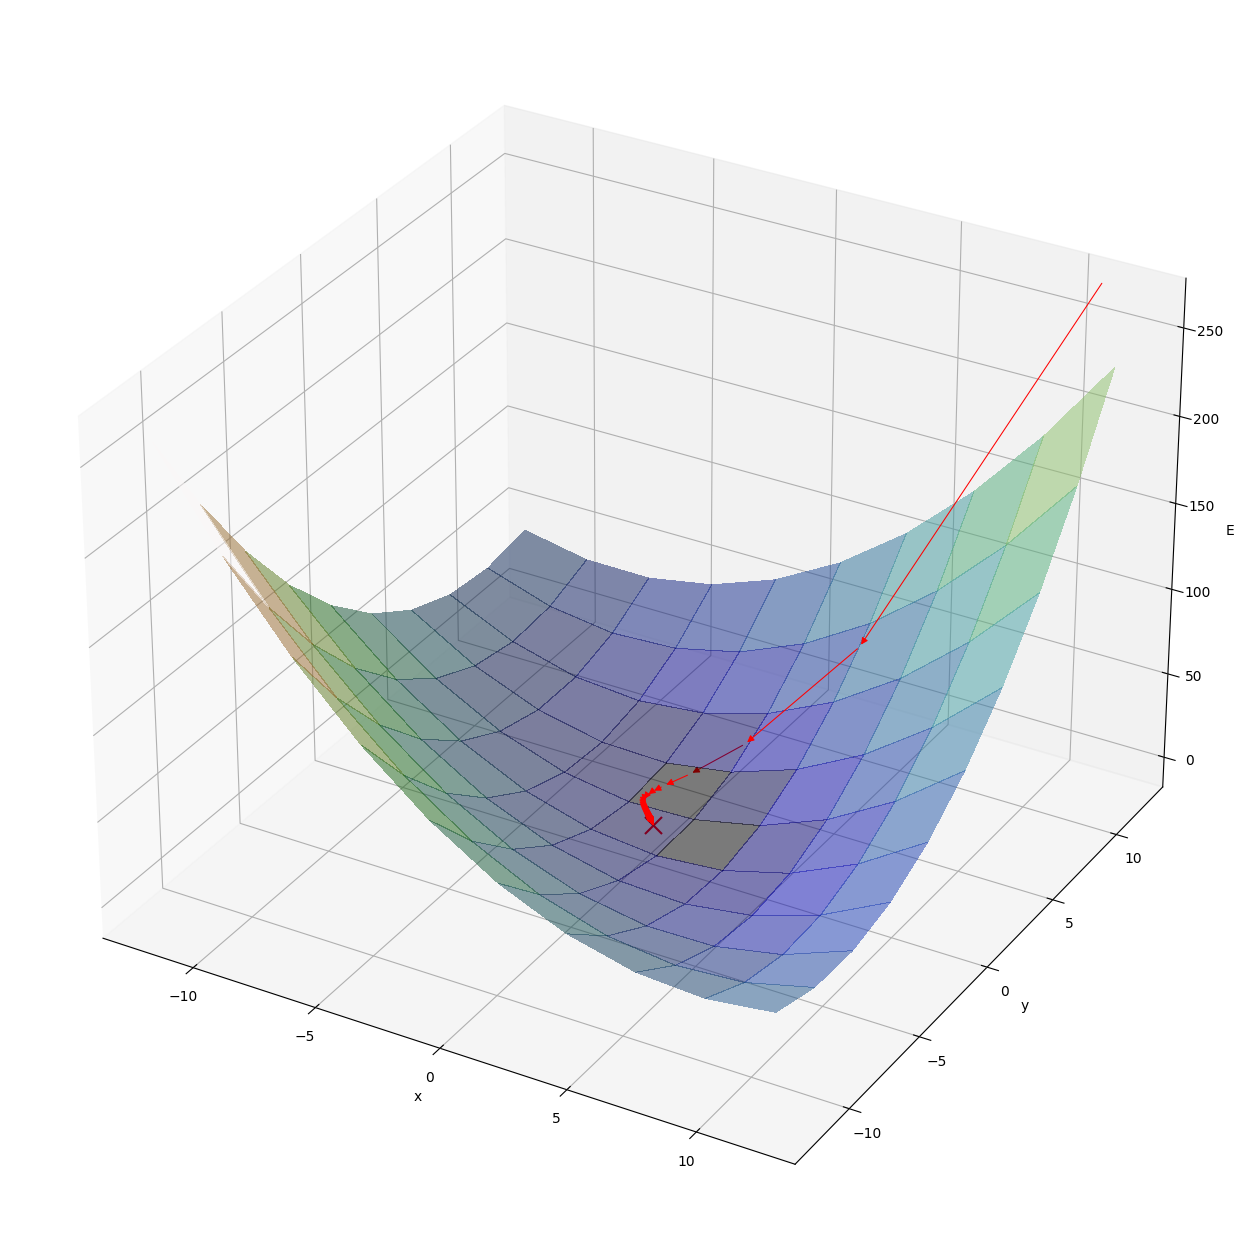

In [56]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LightSource
import warnings


def plot_3d(points_info, title = None):
    # налаштування графіка
    fig = plt.figure(figsize=(25,16));
    ax = plt.axes(projection ='3d');
    ax.set_xlabel('x');
    ax.set_ylabel('y');
    ax.set_zlabel('E');
    
    if title:
        ax.set_title(title, fontsize=18)
        
    X = np.linspace(-12, 12, 10)
    Y = np.linspace(-12, 12, 10)
    X, Y = np.meshgrid(X, Y)
    Z = 0.5*X**2 + 0.7*X*Y - 0.5*X + 0.5*Y**2 - 0.6*Y + 1.0
    
    # побудова площини
    ls = LightSource(270, 45)
    rgb = ls.shade(Z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False, alpha = 0.5)

    # траєкторії вектора ваг
    vectors = []
    for index in range(len(points_info)-1):
        xs = [float(points_info[index][0]), float(points_info[index+1][0])]
        ys = [float(points_info[index][1]), float(points_info[index+1][1])]
        zs = [float(cost_func.subs({x:points_info[index][0], y:points_info[index][1]})),
              float(cost_func.subs({x:points_info[index+1][0], y:points_info[index+1][1]}))]
    
        vectors.append([xs, ys, zs])
    
    
    for vector in vectors:
        a = Arrow3D(vector[0], vector[1], vector[2], mutation_scale=10, 
                lw=0.75, arrowstyle="-|>", color="r")
        ax.add_artist(a)

    # точка глобального мінімуму
    ax.scatter(0.157209, 0.489850, 0.813725527349387 , s=150, color='red', marker = "x");
    plt.show()
    
plot_3d(points_info)

Тепер побудуємо траєкторію вектора ваг в площині $W$

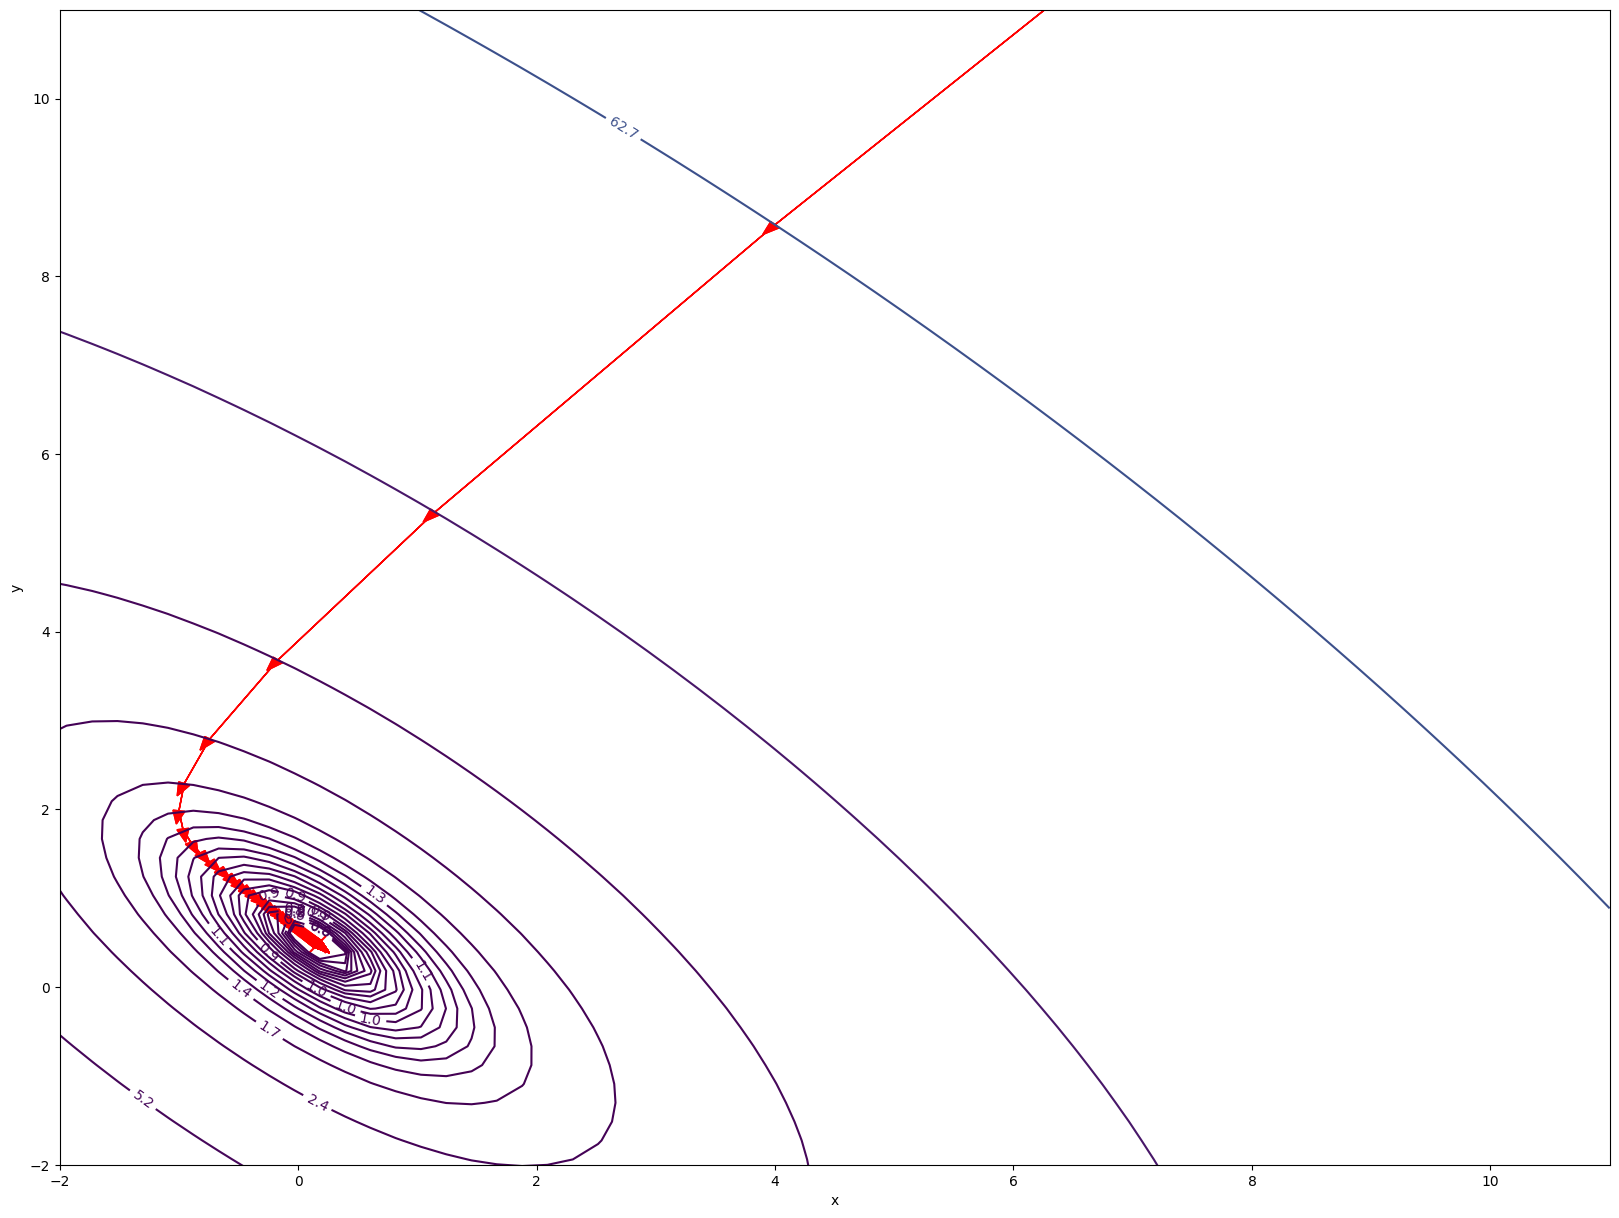

In [57]:
def plot_2d(points_info, n = 25, title = None, x_lim = (-2, 11), y_lim = (-2, 11)):
    #  налаштування графіка
    fig = plt.figure(figsize=(20,15));
    ax = plt.axes();
    ax.set_xlim(x_lim[0], x_lim[1])
    ax.set_ylim(y_lim[0], y_lim[1])
    ax.set_xlabel('x');
    ax.set_ylabel('y');
    
    if title:
        ax.set_title(title, fontsize=25)
    
    
    X = np.linspace(-10, 11, 100)
    Y = np.linspace(-10, 11, 100)
    X, Y = np.meshgrid(X, Y)
    Z = 0.5*X**2 + 0.7*X*Y - 0.5*X + 0.5*Y**2 - 0.6*Y + 1.0

    # лінії рівня
    func_values = []
    for point in points_info:
        func_values.append(float(cost_func.subs({x:point[0], y:point[1]})))
    
    func_values.sort()
    cs = plt.contour(X, Y, Z, levels = func_values[len(points_info)-n:])
    ax.clabel(cs, cs.levels, inline=True)

    # траєкторії вектора ваг
    vectors = []
    for index in range(len(points_info)-1):
        xs = [float(points_info[index][0]), float(points_info[index+1][0])]
        ys = [float(points_info[index][1]), float(points_info[index+1][1])]
        vectors.append([xs, ys])
        
    for vector in vectors:
        x_  = vector[0][0]
        y_  = vector[1][0]
        dx_ = vector[0][1] - x_
        dy_ = vector[1][1] - y_
        
        arr1 = plt.arrow(x = x_, y = y_, dx = dx_, dy = dy_, color = "red",  head_width = 0.1)
        ax.add_artist(arr1)

    # глобальний мінімум функції
    ax.scatter(0.157209, 0.489850, s=150, color='red', marker = "x");
    plt.show()

plot_2d(points_info)

## 3. Підбір $\eta_1$ та $\eta_2$ згідно з завданням

Як відомо з лекцій збіжність градієнтного спуску гарантується за умови $0 < \eta < \frac{2}{\lambda_{max}}$, де $\lambda_{max}$ - найбільше власне число матриці $R_x$. Обрахуємо значення $\lambda_{max}$:

$$
\text{det} R_x = 
\begin{vmatrix}
1 - \lambda & 0.7 \\
0.7 & 1 - \lambda
\end{vmatrix}
=
(1 - \lambda)(1 - \lambda) - 0.49 = 1 - 2 \lambda + \lambda^2 - 0.49 = \lambda^2 - 2 \lambda + 0.51\quad \Rightarrow \quad \lambda_{1,2} = \frac{2 \pm \sqrt{1.96}}{2} \quad \Rightarrow \quad \lambda_{max} =  \approx 1.707
$$

Таким чином отримали, що в нашому випадку для того, щоб алгоритм збігався має виконуватись умова $0 < \eta < \frac{2}{ 1.707}$. Тоді виберемо такі значення $\eta_1 = 0.5,  \eta_2 = 1.25$ 

## 3.1 Робота алгоритму зі швидкістю навчання $\eta_1$

In [11]:
points_info = gradient_descent(function = cost_func, x_0 = [10, 10] , eps = 1e-4, learning_rate = 0.5, n = 6)

,x,y,function
0,10,10,160.000000000000
1,1.750000,1.800000,4.40124998800457
2,0.495000,0.587500,0.898659356468916
3,0.291875,0.420500,0.818681542902321
4,0.248762,0.408094,0.816037024348703
5,0.231548,0.416980,0.815367021812280
6,0.219831,0.427448,0.814910860920142
7,0.210309,0.436783,0.814581900507940
8,0.202280,0.444783,0.814344254445128
9,0.195466,0.451594,0.814172544981334


час виконання в секундах:  0.203


Як бачимо алгоритм виконався за меншу кількість ітерацій ніж у випадку, коли $\eta = 0.3$. Тепер побудуємо траєкторію вектора ваг в тривимірному просторі і в площині $W$

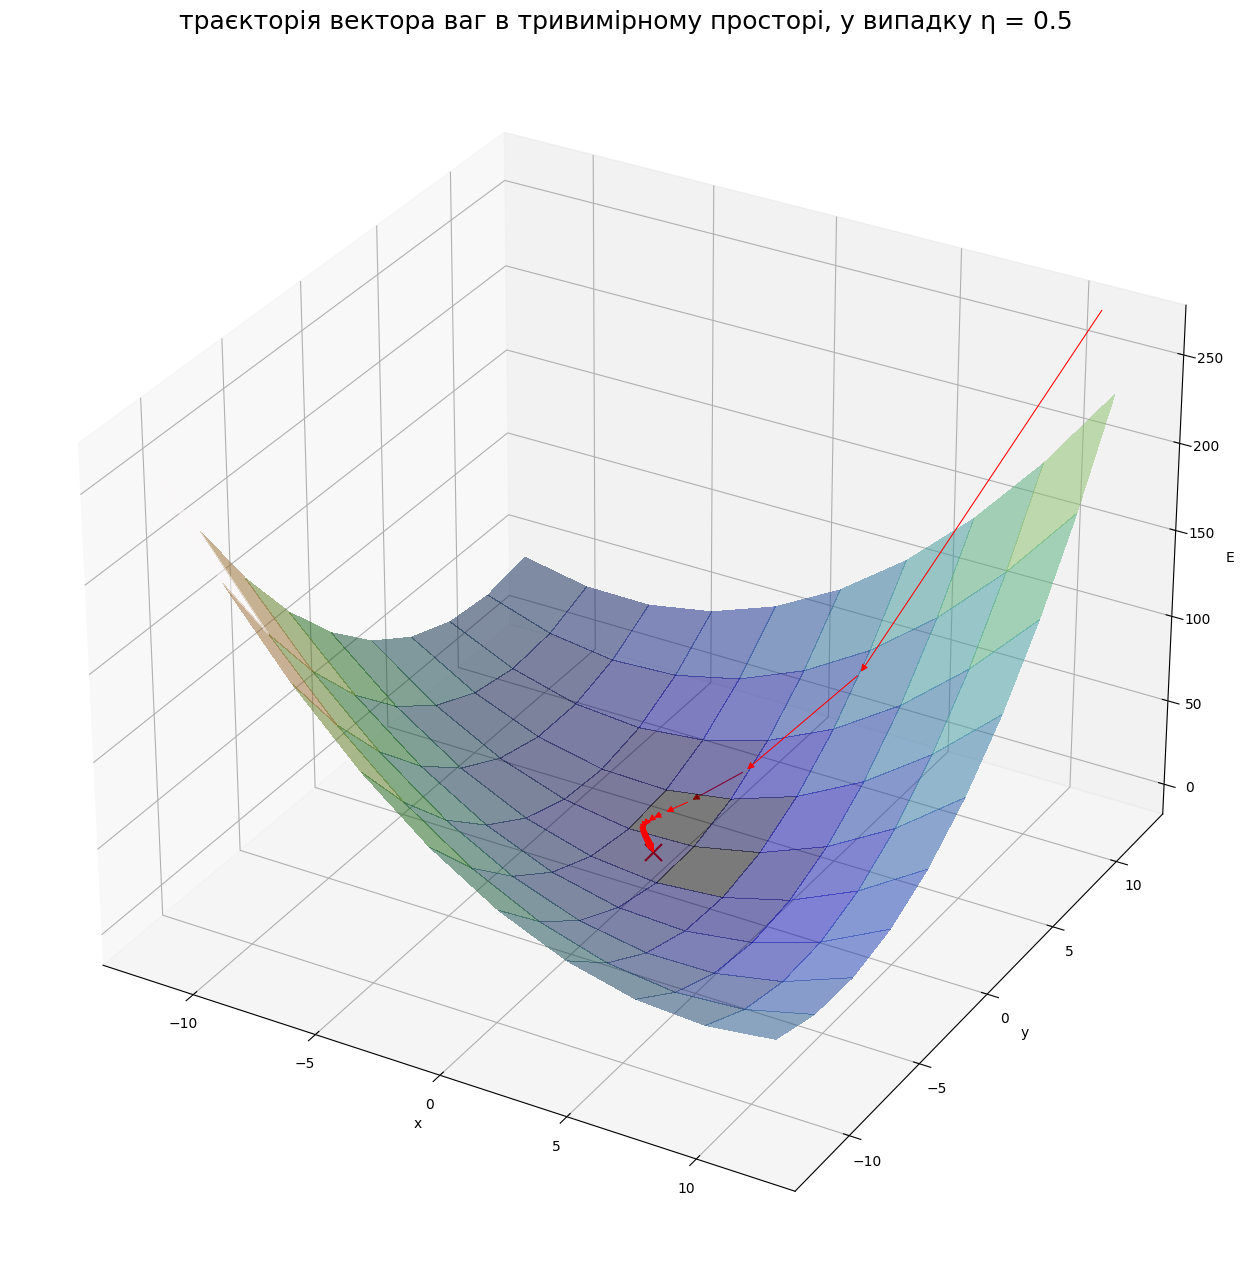

In [58]:
plot_3d(points_info, title = "траєкторія вектора ваг в тривимірному просторі, у випадку η = 0.5")

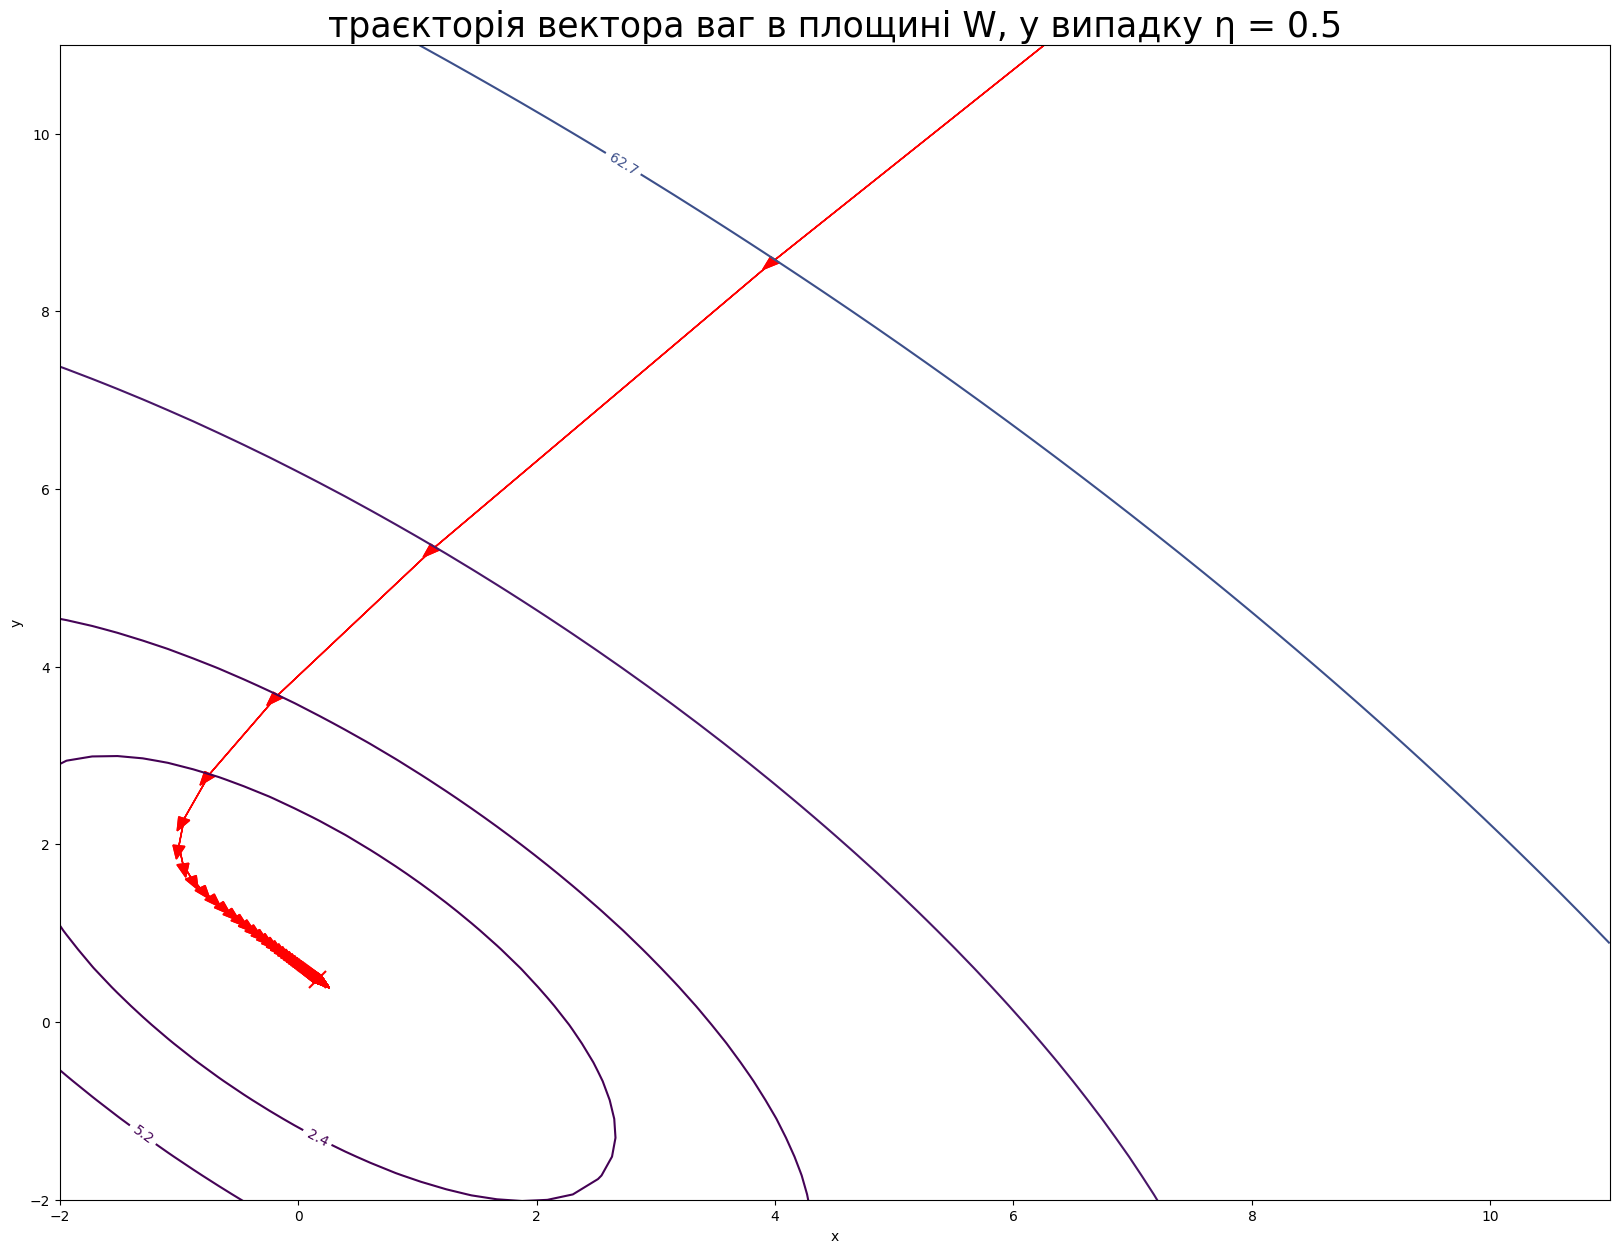

In [59]:
plot_2d(points_info, n = 5, title = "траєкторія вектора ваг в площині W, у випадку η = 0.5")

## 3.2 Робота алгоритму зі швидкістю навчання $\eta_2$

In [61]:
points_info = gradient_descent(function = cost_func, x_0 = [10, 10] , eps = 1e-4, learning_rate = 1.25, n = 7, max_iter = 20000)

,x,y,function
0,10,10,160.000000000000
1,-10.6250000,-10.5000000,202.276562500000
2,12.4687500,12.6718750,255.787280273437
3,-13.5800781,-13.3281250,323.513517576855
4,15.6821289,15.9645996,409.230215554101
...,...,...,...
19997,-7.63323022332434e+1023,-7.63323022332434e+1023,9.90525461918627e+2047
19998,8.58738400123988e+1023,8.58738400123988e+1023,1.25363378774076e+2048
19999,-9.66080700139487e+1023,-9.66080700139487e+1023,1.58663026260940e+2048
20000,1.08684078765692e+1024,1.08684078765692e+1024,2.00807892611501e+2048


час виконання в секундах:  75.2653


 Бачимо що алгоритм - розбіжний при $\eta = 1.25$, спробуємо побудувати траекторію вектора ваг в тривимірному просторі і в площині $W$. Але спочатку зменшимо значення max_iter до 40, для кращої візуалізації.

In [64]:
points_info = gradient_descent(function = cost_func, x_0 = [10, 10] , eps = 1e-4, learning_rate = 1.25, n = 7, max_iter = 40)

,x,y,function
0,10,10,160.000000000000
1,-10.6250000,-10.5000000,202.276562500000
2,12.4687500,12.6718750,255.787280273437
3,-13.5800781,-13.3281250,323.513517576855
4,15.6821289,15.9645996,409.230215554101
5,-17.2645569,-16.9630127,517.715677002376
6,19.7837753,20.0972404,655.017688254699
7,-21.9060292,-21.5851135,828.790591312482
8,24.9884816,25.3140540,1048.72193896872
9,-27.7719176,-27.4434349,1327.07255182346


час виконання в секундах:  0.1233


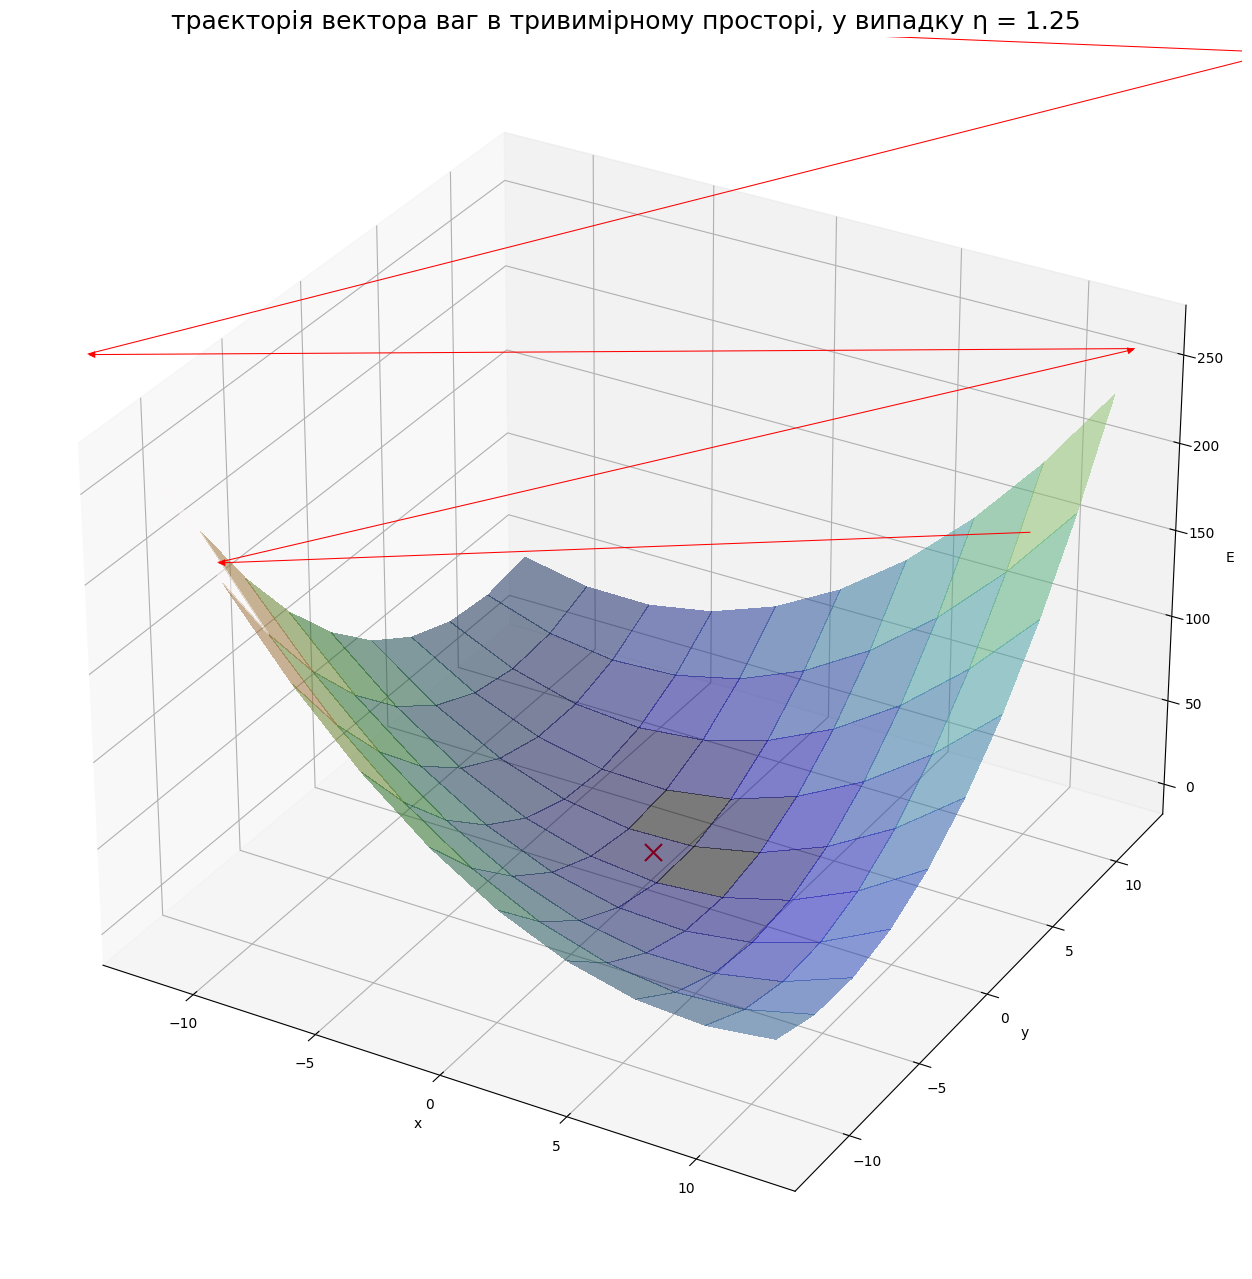

In [65]:
plot_3d(points_info, title = "траєкторія вектора ваг в тривимірному просторі, у випадку η = 1.25")

C:\Users\Vitalii\AppData\Local\Temp\ipykernel_8992\2774729379.py:25: UserWarning: No contour levels were found within the data range.
  cs = plt.contour(X, Y, Z, levels = func_values[len(points_info)-n:])


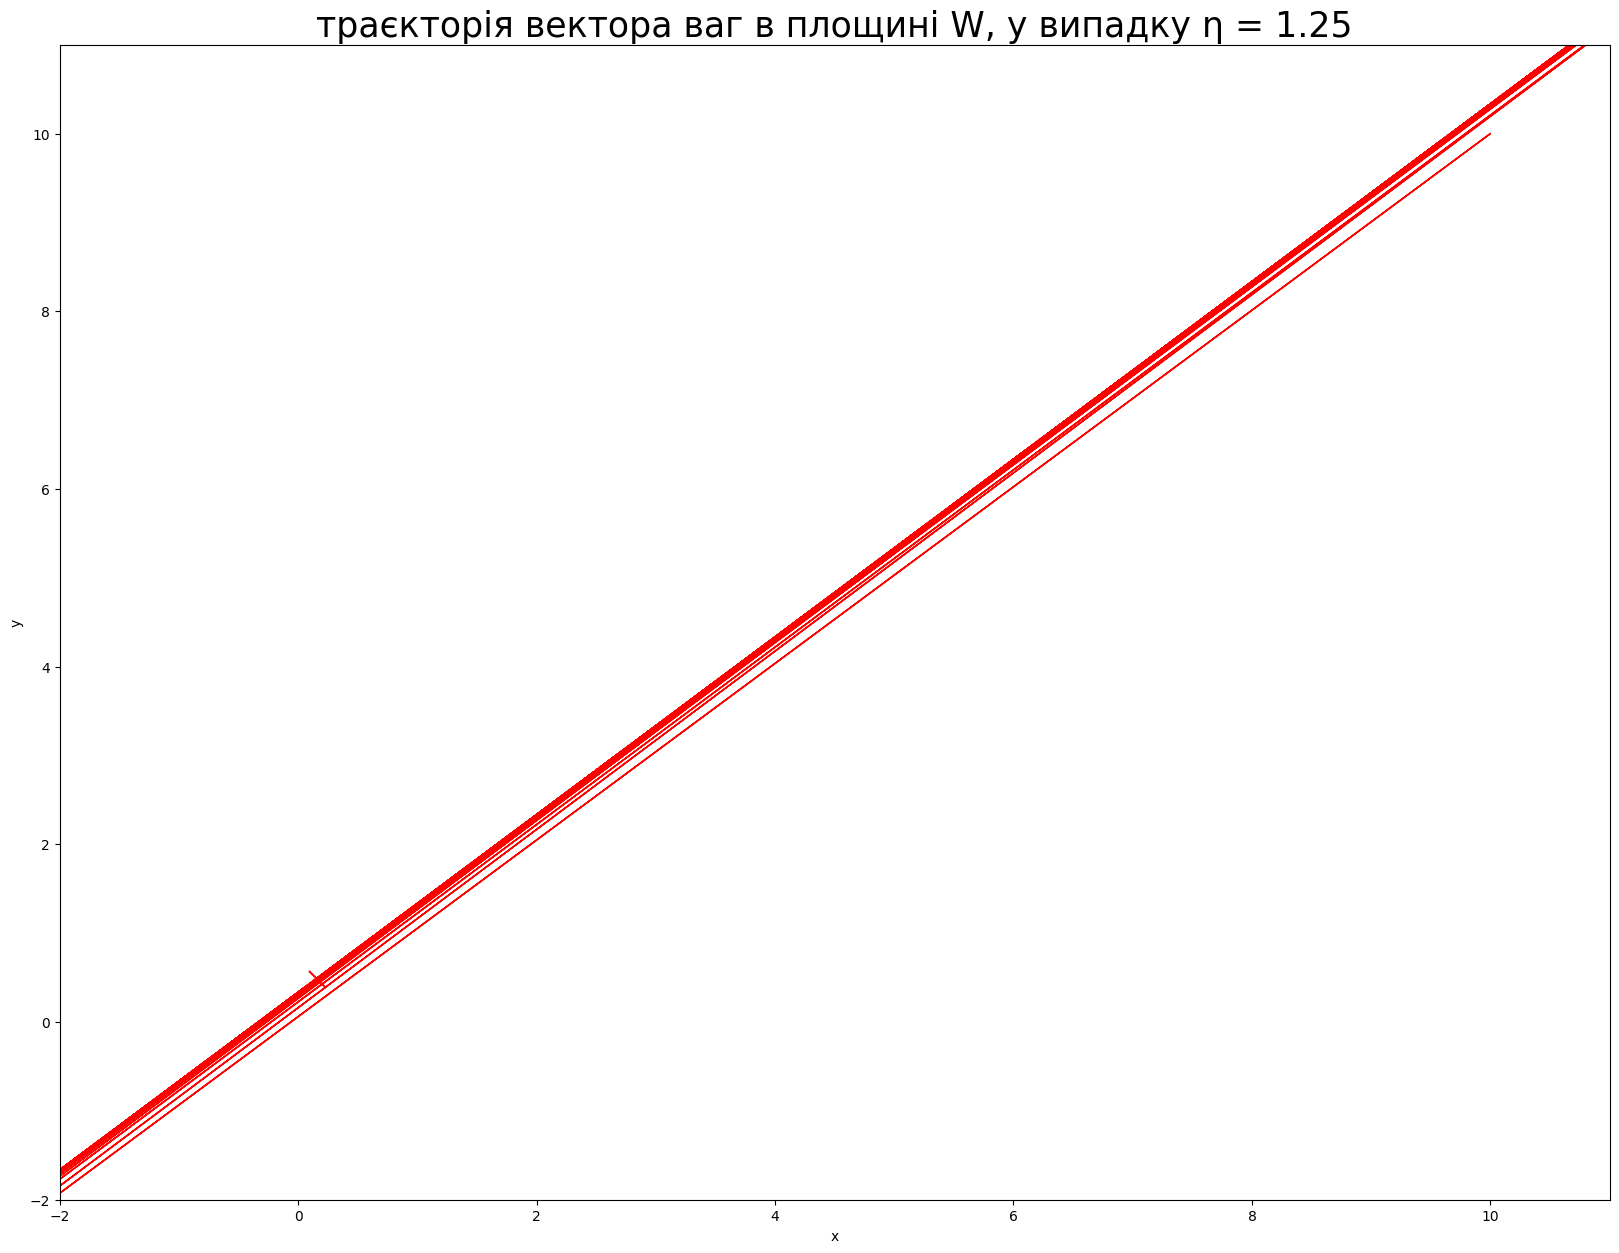

In [67]:
plot_2d(points_info, title = "траєкторія вектора ваг в площині W, у випадку η = 1.25")

# Висновок

У ході даної лабораторної роботи я написав програму, яка реалізує алгоритм градієнтного спуску. Спочатку було аналітично знайдено значення вектору $w^*$ для заданої функції. Потім був реалізований власне алгоритм градієнтного спуску та було візуалізовано тарєкторію вектору ваг в тривимірному просторі і в площині $W$. Були підібрані такі швидкості навчання $\eta_1$ та $\eta_2$ при яких алгоритм, відповідно, збігається та розбігається.